In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Demand

In [2]:
# x: b2/b1, y: Lambda2/Lambda1

# Define the inequality function
def draw_lienar(legend=True):

  def inequality1(x, y): # p1(alpha) = 0 for 0 < alpha < alpha^*
    return np.sqrt(y) - np.sqrt(1/y) > 2*np.sqrt(1/x)

  def inequality2(x, y): # p2^* >= p1^*
    return 2 * (y-1) * (np.sqrt(x) + np.sqrt(y)) >= (y+1) * (np.sqrt(y) - np.sqrt(x))

  def inequality3(x, y): # W'(0) >= 0
    return y >= x

  num = 1000
  k = 8

  # Create a grid of points using meshgrid
  x_vals = np.linspace(1e-20, k, num)
  y_vals = np.linspace(1, k, num)
  X, Y = np.meshgrid(x_vals, y_vals)

  results1 = inequality1(X, Y)

  results2 = ~(results1) & inequality2(X, Y) & inequality3(X,Y)

  results3 = ~(results1) & ~inequality3(X,Y)

  results4 = ~inequality2(X, Y)

  fig, ax = plt.subplots()
  fig.set_size_inches(6, 6)

  # Plot the points that satisfy each inequality with different colors
  marker = '.'
  colors = [plt.cm.viridis((4-i) / 4.0) for i in range(4)]
  colors = ['yellowgreen', 'skyblue', 'orange', 'tomato']

  plt.scatter(X[results1], Y[results1], color = colors[0], marker=marker, label='$(+,+,+)$', s=0.1)
  plt.scatter(X[results2], Y[results2], color = colors[1], marker=marker, label='$(+,-,+)$', s=0.1)
  plt.scatter(X[results3], Y[results3], color = colors[2], marker=marker, label='$(-,-,+)$', s=0.1)
  plt.scatter(X[results4], Y[results4], color = colors[3], marker=marker, label='$(-,+,-)$', s=0.1) #2

  ax.set(ylabel=r'$E[V_2]/E[V_1]$')
  ax.set(xlabel=r'$\Lambda_2/\Lambda_1$')
  ax.xaxis.label.set_fontsize(28)
  ax.yaxis.label.set_fontsize(28)

  ax.plot([1 for i in range(num+1)], [k*i/num for i in range(num+1)], color='black', linestyle='--')

  # Add a legend
  if legend:
    plt.legend(title=r'$\left(\Delta\mathcal{W}, \Delta\mathcal{S}_1, \Delta\mathcal{S}_2\right)$', loc='upper right', markerscale=50)

  plt.xlim([0, k])
  plt.ylim([1, k])

  plt.show()

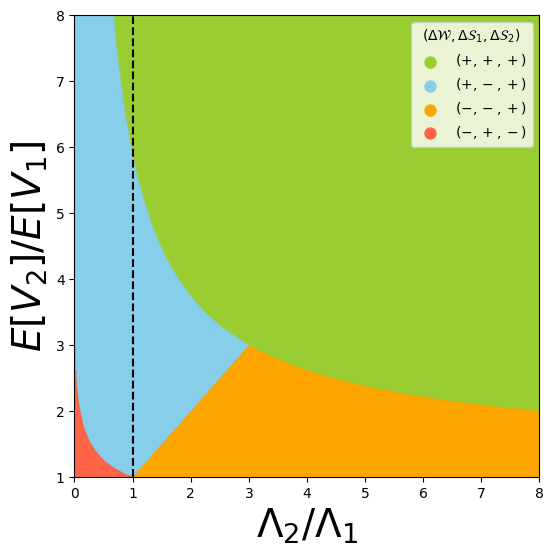

In [3]:
draw_lienar()

# Exponential Demand

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw_exp(beta1=1, Lambda1=1, k=8, num=1000, legend = True):

  # Define the inequality function
  def inequality1(x, y): # p_1^*(alpha) = 0
    return np.log(x) > - np.log(y) + 1/y +1

  def inequality2(x, y): # p_2^*(alpha) = 0
    return -np.log(x) > np.log(y) + y + 1

  def inequality3(x,y):
    return np.log(x) + np.log(y) >= 1/2 * (1/y - y)

  def inequality4(y):
    return y > 1


  # Create a grid of points using meshgrid
  x_vals = np.linspace(1e-23, k, num)
  y_vals = np.linspace(1, k, num)
  X, Y = np.meshgrid(x_vals, y_vals)

  # Evaluate the inequalities for each point in the grid
  results1 = inequality1(X, Y)
  results2 = inequality2(X, Y)
  results3 = (inequality3(X, Y) & inequality4(Y)) & ~(results1 | results2)
  results4 = (~inequality3(X, Y) & ~inequality4(Y)) & ~(results1 | results2)
  results5 = ~(results1 | results2 | results3 | results4)

  fig, ax = plt.subplots()
  fig.set_size_inches(6, 6)

  # Plot the points that satisfy each inequality with different colors
  marker = '.'
  plt.scatter(X[results1], Y[results1], color='yellowgreen', marker=marker, label='$(+,+,+)$', s=0.1)
  plt.scatter(X[results2], Y[results2], color='yellowgreen', marker=marker, s=0.1)
  plt.scatter(X[results3], Y[results3], color='yellowgreen', marker=marker, s=0.1)
  plt.scatter(X[results4], Y[results4], color='yellowgreen', marker=marker, s=0.1)
  plt.scatter(X[results5], Y[results5], color='blueviolet', marker=marker, label='$(-,-,-)$', s=0.1)

  plt.contour(X, Y, results1, levels=[0], colors='black', linewidths=1)
  plt.contour(X, Y, results2, levels=[0], colors='black', linewidths=1)

  ax.set(ylabel=r'$E[V_2]/E[V_1]$')
  ax.set(xlabel=r'$\Lambda_2/\Lambda_1$')
  ax.xaxis.label.set_fontsize(28)
  ax.yaxis.label.set_fontsize(28)

  ax.plot([1 for i in range(num+1)], [k*i/num for i in range(num+1)], color='black', linestyle='--')

  if legend:
    plt.legend(title=r'$\left(\Delta\mathcal{W}, \Delta\mathcal{S}_1, \Delta\mathcal{S}_2\right)$', loc='upper right', markerscale=50)


  plt.xlim([0, k])
  plt.ylim([1, k])

  plt.show()


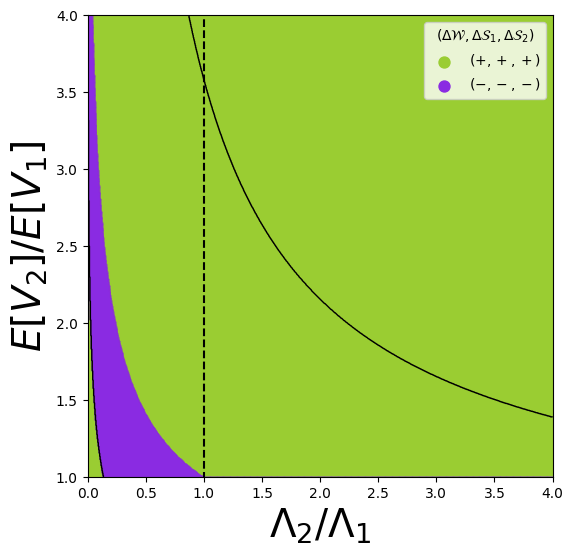

In [5]:
draw_exp(beta1=1, Lambda1=1, k=4)